## Biodiversity EDA
In this project I will be doing data analysis on data from the National Parks Service about endagered species in different parks. I will be doing some analysis on the conservation status of these species and investigate if there are any patterns or themes to the types of species that become endangered.

Some questions I am trying to answer:
* What are the distribution of animal observations across the different parks?
* Are certain species more likely to be endangered than others?
* What are the distribution of conservation statuses across the different parks?

Both observations.csv and species_info.csv were provided by [CodeCademy](http://www.codecademy.com)

In [151]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [152]:
# Importing species data
species = pd.read_csv('species_info.csv')

# Print first 5 rows
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In the conservation_status column we see a lot of missing values that we are going to have to clean up.

In [153]:
#Importing observations
observations = pd.read_csv('observations.csv')

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Looking at data characterisitcs

In [154]:
species.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


Looking at the species dataframe we can see that it contains 5824 rows of data and 4 columns. We can also see that they are all of the object data type. 

In [155]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In the observations dataframe we see that there are 23296 rows and 3 columns. This dataframe has 2 object data types and 1 int64 data type.

## Exploratory Data Analysis

In [156]:
# Looking at the count of different animal categories
count_species = species.groupby('category').count().drop(
    columns=['common_names', 'conservation_status'])

count_species

,scientific_name
category,
Amphibian,80
Bird,521
Fish,127
Mammal,214
Nonvascular Plant,333
Reptile,79
Vascular Plant,4470


Here we can see that the vascular plant category makes up a significant portion of the data in the species table (77%).

<AxesSubplot:xlabel='Category', ylabel='Count'>

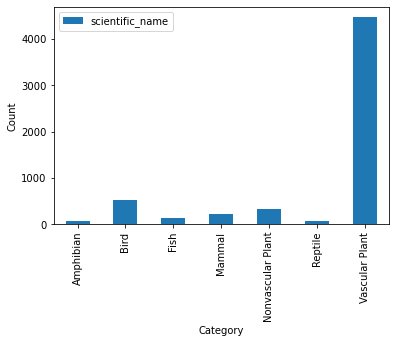

In [157]:
# Creating a bar plot for the counts
count_species.plot.bar(xlabel='Category', ylabel='Count')

In [158]:
count_observations = observations.groupby('park_name').sum()
count_observations

,observations
park_name,
Bryce National Park,576025
Great Smoky Mountains National Park,431820
Yellowstone National Park,1443562
Yosemite National Park,863332


<AxesSubplot:xlabel='Park Name', ylabel='Observation in millions'>

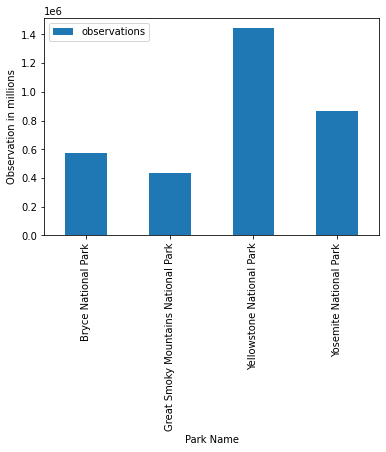

In [159]:
count_observations.plot.bar(xlabel='Park Name', ylabel='Observation in millions')

Yellowstone National Park has the highest number og observations with 1443562 observations total.

Now that we have explored our data it's time we answer our questions.

* ## What are the distribution of animals across the different parks?

Since the data we need is spread across multiple tables we are going to need to combine the 2 tables using the Pandas merge function, but before that we will have to fill in those missing values in the species table.

In [160]:
# Using fillna function to fill in missing values
species.fillna('No intervention', inplace=True)

In [161]:
# Merging species table and ovservation table into single data frame
merged_df = pd.merge(species, observations, how='left', on='scientific_name')
merged_df

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No intervention,Yosemite National Park,128
...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No intervention,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No intervention,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No intervention,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No intervention,Bryce National Park,111


In [162]:
# Creating table to look at observations of animals
ax = merged_df.groupby(['park_name', 'category']).sum()
ax

observations
park_name                           category                       
Bryce National Park                 Amphibian                  7542
                                    Bird                      58590
                                    Fish                      12823
                                    Mammal                    28830
                                    Nonvascular Plant         32992
                                    Reptile                    8141
                                    Vascular Plant           484373
Great Smoky Mountains National Park Amphibian                  5876
                                    Bird                      42869
                                    Fish                       9482
                                    Mammal                    21056
                                    Nonvascular Plant         24857
                                    Reptile                    5841
                                    Vascular Plant           364882
Yellowstone National Park           Amphibian                 19937
                                    Bird                     144300
                                    Fish                      31459
                                    Mammal                    70701
                                    Nonvascular Plant         83021
                                    Reptile                   20061
                                    Vascular Plant          1218162
Yosemite National Park              Amphibian                 11713
                                    Bird                      86612
                                    Fish                      19137
                                    Mammal                    42533
                                    Nonvascular Plant         49783
                                    Reptile                   11779
                                    Vascular Plant           727895

<AxesSubplot:xlabel='Park Name', ylabel='Count in millions'>

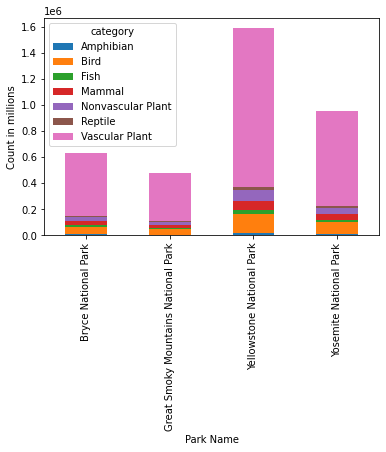

In [163]:
# Creating stacked bar chart for anaimal distribution across parks.
pd.pivot_table(ax.reset_index(),
               index='park_name', columns='category', values='observations'
               ).plot.bar(stacked=True, xlabel='Park Name', ylabel='Count in millions')


* ## Are certain species more likely to be endangered than others?

In [164]:
ax = merged_df.groupby(['conservation_status', 'category']).count()
ax


scientific_name  common_names  \
conservation_status category                                           
Endangered          Amphibian                        4             4   
                    Bird                            16            16   
                    Fish                            12            12   
                    Mammal                          44            44   
                    Vascular Plant                   4             4   
In Recovery         Bird                            12            12   
                    Mammal                          12            12   
No intervention     Amphibian                      300           300   
                    Bird                          2016          2016   
                    Fish                           476           476   
                    Mammal                         968           968   
                    Nonvascular Plant             1312          1312   
                    Reptile                        304           304   
                    Vascular Plant               19376         19376   
Species of Concern  Amphibian                       16            16   
                    Bird                           320           320   
                    Fish                            16            16   
                    Mammal                         168           168   
                    Nonvascular Plant               20            20   
                    Reptile                         20            20   
                    Vascular Plant                 172           172   
Threatened          Amphibian                        8             8   
                    Fish                            20            20   
                    Mammal                           8             8   
                    Vascular Plant                   8             8   

                                       park_name  observations  
conservation_status category                                    
Endangered          Amphibian                  4             4  
                    Bird                      16            16  
                    Fish                      12            12  
                    Mammal                    44            44  
                    Vascular Plant             4             4  
In Recovery         Bird                      12            12  
                    Mammal                    12            12  
No intervention     Amphibian                300           300  
                    Bird                    2016          2016  
                    Fish                     476           476  
                    Mammal                   968           968  
                    Nonvascular Plant       1312          1312  
                    Reptile                  304           304  
                    Vascular Plant         19376         19376  
Species of Concern  Amphibian                 16            16  
                    Bird                     320           320  
                    Fish                      16            16  
                    Mammal                   168           168  
                    Nonvascular Plant         20            20  
                    Reptile                   20            20  
                    Vascular Plant           172           172  
Threatened          Amphibian                  8             8  
                    Fish                      20            20  
                    Mammal                     8             8  
                    Vascular Plant             8             8

* ## What are the distribution of conservation statuses across the different parks?

## Conclusion